# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import os
import requests
from PIL import Image
from io import BytesIO
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
twitter_df = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url ="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(r.content)

In [4]:
images_df = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Read the JSON file into a DataFrame
tweets_df = pd.read_json('tweet-json.txt', lines=True)

# Extract relevant columns
tweets_df = tweets_df[['id', 'retweet_count', 'favorite_count']]

# Rename columns for clarity
tweets_df.columns = ['tweet_id', 'retweet_count', 'favorite_count']

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment

In [6]:
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### twitter_df columns description:
- tweet_id: the unique identifier for each tweet

- in_reply_to_status_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID

- in_reply_to_user_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID

- timestamp: time when this Tweet was created

- source: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client

- text: actual UTF-8 text of the status update

- retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID

- retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID

- retweeted_status_timestamp: time of retweet

- expanded_urls: tweet URL

- rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10

- rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10

- name: name of the dog

- doggo: dog stage

- floofer: dog stage

- pupper: dog stage

- puppo: dog stage

In [7]:
images_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### images_df columns description:
- tweet_id is the last part of the tweet URL after "status/".

- p1 is the algorithm's #1 prediction for the image in the tweet.

- p1_conf is how confident the algorithm is in its #1 prediction.

- p1_dog is whether or not the #1 prediction is a breed of dog.

- p2 is the algorithm's second most likely prediction.

- p2_conf is how confident the algorithm is in its #2 prediction.

- p2_dog is whether or not the #2 prediction is a breed of dog.

- p3 is the algorithm's third most likely prediction.

- p3_conf is how confident the algorithm is in its #3 prediction.

- p3_dog is whether or not the #3 prediction is a breed of dog.

In [8]:
tweets_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


### tweet_json columns description
- id: the unique identifier for each tweet

- retweet_count: the number of times the original tweet was retweeted

- favorite_count: the number of times the the original tweet was loved or liked

In [9]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
twitter_df[twitter_df['rating_numerator'] > 12].rating_numerator.value_counts()

13      351
14       54
75        2
15        2
420       2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
960       1
84        1
88        1
99        1
121       1
143       1
144       1
666       1
165       1
182       1
204       1
1776      1
80        1
Name: rating_numerator, dtype: int64

In [11]:
twitter_df[twitter_df['rating_numerator'] ==1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


*Issue* : rating_numerator of 1776 is too oulier for the rest of data

### Programmatic Assessment

In [12]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [15]:
all_columns = pd.Series(list(twitter_df) + list(images_df) + list(tweets_df))

In [16]:
all_columns

0                       tweet_id
1          in_reply_to_status_id
2            in_reply_to_user_id
3                      timestamp
4                         source
5                           text
6            retweeted_status_id
7       retweeted_status_user_id
8     retweeted_status_timestamp
9                  expanded_urls
10              rating_numerator
11            rating_denominator
12                          name
13                         doggo
14                       floofer
15                        pupper
16                         puppo
17                      tweet_id
18                       jpg_url
19                       img_num
20                            p1
21                       p1_conf
22                        p1_dog
23                            p2
24                       p2_conf
25                        p2_dog
26                            p3
27                       p3_conf
28                        p3_dog
29                      tweet_id
30        

In [17]:
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [18]:
twitter_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
twitter_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
twitter_df[twitter_df.rating_denominator==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [21]:
images_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
beagle                        18
Eskimo_dog                    18
teddy                         18
Maltese_dog                   18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [22]:
images_df.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
malinois                           20
toy_terrier                        20
miniature_pinscher                 20
chow                               20
Samoyed                            20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [23]:
twitter_df[twitter_df['retweeted_status_id'].notnull()] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


### Quality issues
`twitter_df` table:

- `retweeted_status_id`, `retweeted_status_user _id`, and `retweeted_status _timestamp` that are not null are retweeted and won't be used for our analysis.

- Missing values in `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id`, `in_reply_to_user_id`, `expanded_urls`  columns contain mostly missing values.

- Missing rating (rating_numerator/rating_denominator)

- Erroneous datatypes (timestamp should be a datetime, tweet_id should be a string)

- Contains html tags in Source columns

- Some names in name column are not a real name.

- Nulls represented as None in doggo, pupper, puppo, and floofer

- doggo, pupper, puppo, floofer should be category type

- rating_numerator of 1776 is too oulier for the rest of data

`images_df` table:
- Values in columns 'p1', 'p2', and 'p3' don't have consistent format

- Erroneous datatypes (tweet_is should be a string)

`tweets_df` table:
- Erroneous datatypes (tweet_is should be a string).

- tweet_id 776201521193218049: the name should be O'Malley instead of O

### Tidiness issues
`twitter_df` table:
- doggo, pupper, puppo, floofer should be in 1 column because it shows the dog stage

- tweet_id columns in 3 tables should be the same for researching purpose.

- We can merge all 3 tables into one.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
# Make copies of original pieces of data
twitter_clean = twitter_df.copy()
images_clean = images_df.copy()
tweets_clean = tweets_df.copy()

### Missing Values:

### Issue #1: `retweeted_status_id`, `retweeted_status_user _id`, and `retweeted_status _timestamp` that are not null are retweeted and won't be used for our analysis.

#### Define: 
Remove tweet IDs that have 'retweeted_status_id, retweeted_status_user _id, and retweeted_status _timestamp values. 

#### Code

In [25]:
#Remove tweet IDs that have 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' values.
twitter_clean = twitter_clean[twitter_clean.retweeted_status_id.isnull()]
twitter_clean = twitter_clean[twitter_clean.retweeted_status_user_id.isnull()]
twitter_clean = twitter_clean[twitter_clean.retweeted_status_timestamp.isnull()]

#### Test

In [26]:
# Check if the retweets have been droped - should be 0 in 3 prints
print(twitter_clean.retweeted_status_id.notnull().sum())
print(twitter_clean.retweeted_status_user_id.notnull().sum())
print(twitter_clean.retweeted_status_timestamp.notnull().sum())

0
0
0


### Issue #2: Missing values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id, expanded_urls columns contain mostly missing values.

#### Define:  
Those columns are not used in the anlysis. Remove in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns

#### Code

In [27]:
# Make a list of the columns to be dropped
drop_list = ['in_reply_to_status_id', 'in_reply_to_user_id',
'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

In [28]:
# Drop the columns
twitter_clean.drop(drop_list, axis=1, inplace=True)

#### Test

In [29]:
#show the number of columns after dropped 5 columns - the number should be 12
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue #3: Missing rating (rating_numerator/rating_denominator)

#### Define:  
Remove rows which have the rating_denominator is smaller or equal 0 <br>
Calculate the rate column: rating_numerator divided by rating_denominator

#### Code

In [30]:
#Remove rows which have the rating_denominator is smaller or equal 0
twitter_clean = twitter_clean[twitter_clean.rating_denominator > 0]

In [31]:
#Calculate the rate column: rating_numerator divided by rating_denominator
twitter_clean['rate'] = (twitter_clean.rating_numerator / twitter_clean.rating_denominator)

#### Test

In [32]:
#show the descriptive statistic of rate column
twitter_clean.rate.describe()

count    2174.000000
mean        1.223398
std         4.247731
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rate, dtype: float64

### Tidiness:

### Issue #4: doggo, pupper, puppo, floofer should be in 1 column because it shows the dog stage.
### Issue #5: Nulls represented as None in doggo, pupper, puppo, and floofer

#### Define
- First replace the None values to nan in doggo, pupper, puppo, floofer
- Merge 4 columns: doggo, pupper, puppo, floofer into one named dog_stage
- Drop 4 previous columns: doggo, pupper, puppo, floofer.
- Convert empty cell to undefined in dog_stage column

#### Code

In [33]:
#First replace the None values to nan in doggo, pupper, puppo, floofer
twitter_clean.doggo = twitter_clean.doggo.replace('None',np.nan)
twitter_clean.pupper = twitter_clean.pupper.replace('None',np.nan)
twitter_clean.puppo = twitter_clean.puppo.replace('None',np.nan)
twitter_clean.floofer = twitter_clean.floofer.replace('None',np.nan)

In [34]:
# Merge 4 columns: doggo, pupper, puppo, floofer into one named dog_stage
twitter_clean['dog_stage'] = twitter_clean[['doggo', 'pupper', 'puppo','floofer']].apply(lambda x: ', '.join(x.dropna()), axis=1)

In [35]:
#Drop 4 previous columns: doggo, pupper, puppo, floofer.
twitter_clean.drop(['doggo', 'pupper', 'puppo','floofer'], axis=1, inplace=True)

In [36]:
#Convert empty cell to None in dog_stage column
twitter_clean['dog_stage'] = twitter_clean['dog_stage'].replace('','None')

#### Test

In [37]:
#show the result
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rate,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,None


In [38]:
twitter_clean.dog_stage.value_counts()

None              1830
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

In [39]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2174 non-null int64
timestamp             2174 non-null object
source                2174 non-null object
text                  2174 non-null object
expanded_urls         2117 non-null object
rating_numerator      2174 non-null int64
rating_denominator    2174 non-null int64
name                  2174 non-null object
rate                  2174 non-null float64
dog_stage             2174 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 186.8+ KB


##### Issue #6 and #7: tweet_id columns in 3 tables should be the same for researching purpose, we can merge all 3 tables into one.

#### Define
Use merge function to merge 3 tables by the inner join

#### Code

In [40]:
#Use merge function to merge 3 tables by the inner join
Merge_df = pd.merge(twitter_clean, images_clean, on = 'tweet_id', how = 'inner').merge(tweets_clean, on = 'tweet_id', how = 'inner')

#### Test

In [41]:
#check if the result data have all the columns of 3 previous datasets.
Merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
rate                  1994 non-null float64
dog_stage             1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null b

In [42]:
#show few rows for checking result
Merge_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rate,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


### Quality:

### Issue #7, #8 and #9: Erroneous datatypes (timestamp should be a datetime, tweet_id should be a string)

#### Define
- Because we already merged 3 table into one. So we can ignore issue 9 and 10 ( change tweet_id datatype in `image` and `tweets`. 
- Change the timestamp datatype to datetime and then change the tweet_id datatype to string in `Merge_df`

#### Code

In [43]:
#Change the timestamp datatype to datetime
Merge_df.timestamp = pd.to_datetime(Merge_df.timestamp)

In [44]:
#Change the tweet_id datatype to string
Merge_df.tweet_id = Merge_df.tweet_id.astype(str)

#### Test

In [45]:
#check the data types - timestamp should be datetime and tweet_id should be string (object)
Merge_df.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
rate                         float64
dog_stage                     object
jpg_url                       object
img_num                        int64
p1                            object
p1_conf                      float64
p1_dog                          bool
p2                            object
p2_conf                      float64
p2_dog                          bool
p3                            object
p3_conf                      float64
p3_dog                          bool
retweet_count                  int64
favorite_count                 int64
dtype: object

### Issue #10: Contains html tags in Source columns

#### Define
Remove all the string starts with the "<" and ends with the ">"

#### Code

In [46]:
#Check the source value first.
Merge_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [47]:
#Remove all the string starts with the "<" and ends with the ">"
Merge_df.source = Merge_df.source.str.replace(r'<[^>]+>', '', regex=True)

#### Test

In [48]:
#check the source value again.
Merge_df.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### Issue #11: Some names in name column are not a real name.

#### Define
The valid name's first letter should be uppercase, so replace all the lowercase string in name to "None"

#### Code

In [49]:
#replace all the lowercase string in name to "None"
Merge_df.loc[Merge_df.name.str.islower(),'name'] = 'None'

#### Test

In [50]:
#show a few rows to check
Merge_df.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rate,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
231,835574547218894849,2017-02-25 19:37:50,Twitter for iPhone,This is Eli. He works backstage at Bone Jovi c...,https://twitter.com/dog_rates/status/835574547...,11,10,Eli,1.1,None,...,0.610655,True,muzzle,0.132138,False,American_Staffordshire_terrier,0.109544,True,4121,19447
1027,706346369204748288,2016-03-06 05:11:12,Twitter for iPhone,This is Koda. She's a Beneboom Cumberwiggle. 1...,https://twitter.com/dog_rates/status/706346369...,12,10,Koda,1.2,None,...,0.956462,True,Rottweiler,0.025381,True,Appenzeller,0.008679,True,1035,3768
662,758467244762497024,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,1.1,None,...,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,2539,5316
925,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,1.0,None,...,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,247,2574
650,759923798737051648,2016-08-01 01:28:46,Twitter for iPhone,We only rate dogs... this is a Taiwanese Guide...,https://twitter.com/dog_rates/status/759923798...,10,10,None,1.0,None,...,0.324579,True,seat_belt,0.109168,False,pug,0.102466,True,6521,16284
522,783334639985389568,2016-10-04 15:55:06,Twitter for iPhone,This is Dave. He's currently in a predicament....,https://twitter.com/dog_rates/status/783334639...,12,10,Dave,1.2,None,...,0.593858,True,Shetland_sheepdog,0.130611,True,Pembroke,0.100842,True,13616,32651
150,854732716440526848,2017-04-19 16:25:34,Twitter for iPhone,This is Marlee. She fetched a flower and immed...,https://twitter.com/dog_rates/status/854732716...,12,10,Marlee,1.2,None,...,0.695548,True,Cardigan,0.058902,True,chow,0.028411,True,6690,24188
1551,674644256330530816,2015-12-09 17:38:19,Twitter for iPhone,When you see sophomores in high school driving...,https://twitter.com/dog_rates/status/674644256...,11,10,None,1.1,None,...,0.398102,False,basset,0.335692,True,cocker_spaniel,0.072941,True,311,1111
1054,704054845121142784,2016-02-28 21:25:30,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,None,1.2,None,...,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True,1028,3201
1728,670807719151067136,2015-11-29 03:33:17,Twitter for iPhone,"Say hello to Andy. He can balance on one foot,...",https://twitter.com/dog_rates/status/670807719...,11,10,Andy,1.1,None,...,0.958035,True,Sealyham_terrier,0.013892,True,Border_collie,0.004601,True,546,1234


#### Noticed another issue when look at the sample above: tweet_id 776201521193218049: the name should be O'Malley instead of O

In [51]:
Merge_df[Merge_df.name.str.len() == 1]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rate,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
561,776201521193218049,2016-09-14 23:30:38,Twitter for iPhone,This is O'Malley. That is how he sleeps. Doesn...,https://twitter.com/dog_rates/status/776201521...,10,10,O,1.0,None,...,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True,2919,10681


### Issue #12:  tweet_id 776201521193218049: the name should be O'Malley instead of O

#### Define
Change row of tweet_id 776201521193218049's name from O to O'Malley

#### Code

In [52]:
#Change row of tweet_id 776201521193218049's name from O to O'Malley
Merge_df.loc[Merge_df.tweet_id == '776201521193218049', 'name'] = "O'Malley"

#### Test

In [53]:
#Check if there still exist a name which has 1 letter
Merge_df[Merge_df.name.str.len() == 1]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rate,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [54]:
#check if the row of tweet_id 776201521193218049's name has changed
Merge_df[Merge_df.tweet_id == '776201521193218049']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rate,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
561,776201521193218049,2016-09-14 23:30:38,Twitter for iPhone,This is O'Malley. That is how he sleeps. Doesn...,https://twitter.com/dog_rates/status/776201521...,10,10,O'Malley,1.0,None,...,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True,2919,10681


### Issue #13: doggo, pupper, puppo, floofer should be category type

#### Define
Convert dog_stage to categorical data types

#### Code

In [55]:
#Convert dog_stage to categorical data types
Merge_df.dog_stage = Merge_df.dog_stage.astype('category')

#### Test

In [56]:
#show the data information to check if the dog_stage data types is category
Merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
rate                  1994 non-null float64
dog_stage             1994 non-null category
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994

### Issue #14: rating_numerator of 1776 is too oulier for the rest of data

#### Define
Remove the row which has the rating_numerator of 1776

#### Code

In [57]:
#Remove the row which has the rating_numerator of 1776
Merge_df = Merge_df[Merge_df['rating_numerator'] != 1776]

#### Test

In [58]:
#check if the row which has rating_numertor of 1776 is removed.
Merge_df[Merge_df['rating_numerator'] ==1776]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rate,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [59]:
#check for the number of rows after remove 1 row- should be 2072
Merge_df.shape[0]

1993

### Issue #15: Values in columns 'p1', 'p2', and 'p3' don't have consistent format

#### Define
Change p1, p2, p3 to lowercase

#### Code

In [60]:
Merge_df['p1'] = Merge_df['p1'].str.lower()
Merge_df['p2'] = Merge_df['p2'].str.lower()
Merge_df['p3'] = Merge_df['p3'].str.lower()

#### Test

In [61]:
# Display few rows to check whether names are all lowercase
Merge_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rate,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,None,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,None,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,None,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,9774,41048


In [62]:
#check if the all the names of p1 are lowercase - should be 2072
Merge_df.p1.str.islower().count()

1993

In [63]:
#check if the all the names of p2 are lowercase - should be 2072
Merge_df.p2.str.islower().count()

1993

In [64]:
#check if the all the names of p3 are lowercase - should be 2072
Merge_df.p3.str.islower().count()

1993

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [65]:
# Saving the master dataset to a csv file
Merge_df.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [66]:
#show statistic description of the dataset
Merge_df.describe()

,rating_numerator,rating_denominator,rate,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1.993000e+03,1.993000e+03,1993.000000,1993.000000
mean,11.395886,10.532363,1.080724,1.203211,0.593971,1.344463e-01,6.025323e-02,2766.750627,8897.394882
std,12.670536,7.322538,0.956618,0.560899,0.272019,1.006988e-01,5.090300e-02,4675.871667,12216.030848
min,0.000000,2.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,10.000000,10.000000,1.000000,1.000000,0.362835,5.390140e-02,1.619070e-02,624.000000,1981.000000
50%,11.000000,10.000000,1.100000,1.000000,0.587764,1.175080e-01,4.948690e-02,1359.000000,4134.000000
75%,12.000000,10.000000,1.200000,1.000000,0.846628,1.952180e-01,9.160200e-02,3220.000000,11310.000000
max,420.000000,170.000000,42.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


### Insight 1: Rates and Confidence Intervals
- Rating distribution: average calculated rating is 1.08, minimum is 0 and maximum is 42. The majority of ratings have denominator of 10, the median of rating_numerator is 11

- The highest confidence is the first prediction (maximum is 100%, minimum is 4.43%, average is 59.39%), second is the second prediction (maximum is 48.8%, minimum is ~0%, and average is 13.44%), the least confidence is third prediction(maximum is 27.34%, minimum is ~0%, average is 6.025%)

- The average favorite count is 8557, range from 0 to 132810, the average retweet count is 2976, range from 16 to 79515.

### Insight 2: The correlation between retweet count and favorite count

#### Visualization

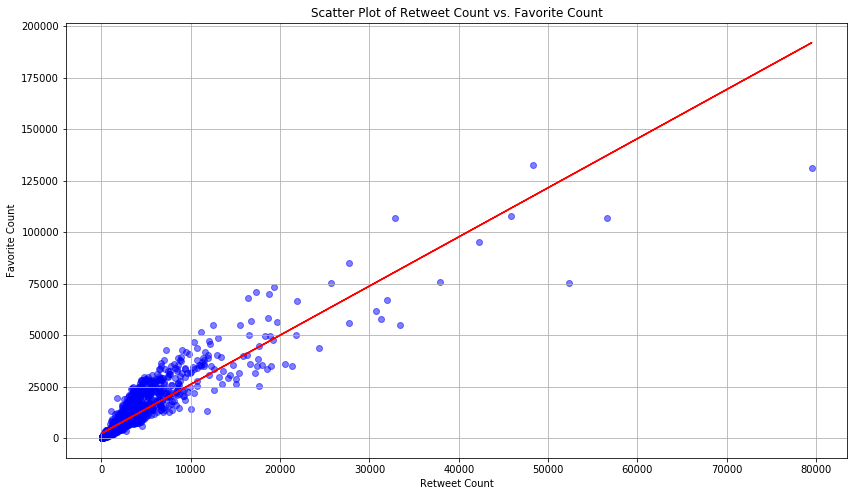

In [67]:
# Add retweet_count data to x-axis and favorite_count data to y-axis
x = Merge_df['retweet_count']
y = Merge_df['favorite_count']
# Create a scatter plot to compare retweet count and favorite count correlation.
plt.figure(figsize=(14, 8))
plt.scatter(x, y, alpha=0.5, color='b')
# Add a correlation line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='red')
plt.title('Scatter Plot of Retweet Count vs. Favorite Count')
#Add title and labels
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.grid(True)
plt.show()

In [68]:
#Calculate the correlation number between Retweet Count vs. Favorite Count
Merge_df['retweet_count'].corr(Merge_df['favorite_count'])

0.91296378371603659

Reasoning: This scatter plot will help us understand whether higher audience engagement leads to higher revenues

Summary: Based on the scatter plot and the calculated correlation number result (0.91296378371603659), it shows the positive correlation between Retweet Count and Favorite Count, suggesting that tweets with more retweet tend to be the favorite.

### Insight 3: What is the most popular dog stage?

In [69]:
#Count the values in dog stage column and put it in dog_stage_count dataset (excluding None)
dog_stage_count = Merge_df[Merge_df['dog_stage'] != 'None']

In [70]:
# Count each value of the dog_stage
dog_stage_count= dog_stage_count['dog_stage'].str.strip().value_counts()

#### Visualization

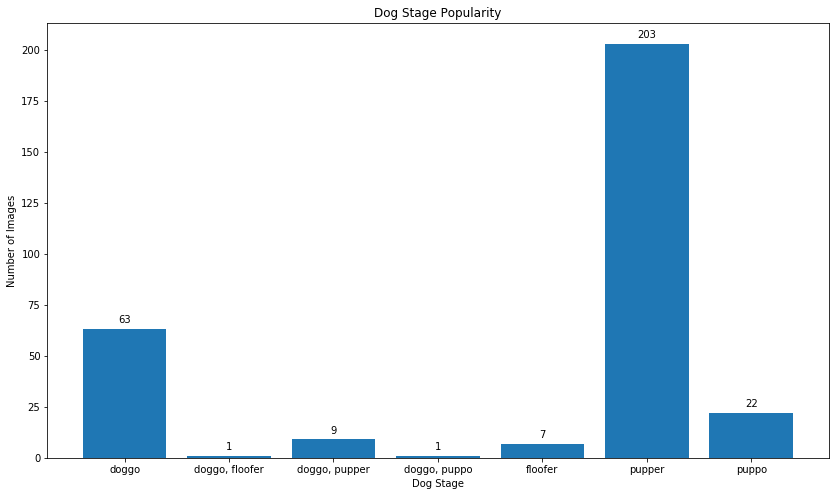

In [71]:
plt.figure(figsize=(14, 8))
#create the bar plot
plt.bar(dog_stage_count.index.tolist(),dog_stage_count)
# Display count values on each bar
for stage, count in zip(dog_stage_count.index.tolist(), dog_stage_count):
    plt.text(stage, count + 2, str(count), ha='center', va='bottom')
plt.title('Dog Stage Popularity')
plt.xlabel('Dog Stage')
plt.ylabel('Number of Images')
plt.show()

Reasoning: This bar plot will help us identify which dog stage is the most popular

Summary: The result shows that user usually sends the image of "pupper" dog stage. The highest count is pupper (210), and the smallest counts are "doggo, floofer" and "doggo,puppo" (1)

### Analysis Decision 1: Rate 's Outlier Removal

**Reasoning**: Because the maximum of `rating_numerator` is still 420 after I removed 1776, which is still an extreme outlier compared to the other values. Removing such extreme values could improve the analysis.

Count all the rating_numerator points:

In [72]:
#show the result of counting all the rating_numerator point
Merge_df.rating_numerator.value_counts()

12     450
10     419
11     396
13     261
9      151
8       95
7       52
14      35
5       33
6       32
3       19
4       16
2        9
1        5
0        2
24       1
420      1
204      1
27       1
44       1
45       1
50       1
60       1
75       1
80       1
84       1
88       1
99       1
121      1
143      1
144      1
165      1
26       1
Name: rating_numerator, dtype: int64

All the rating_numerators which are higher than 20 is just one unit per rating_numerator point, which are significantly smaller than the majority of values. So I decide to remove all the points which are greater than 20.

In [73]:
# remove all the rows which are greater than 20 of rating numerator points
Filtered_df = Merge_df[Merge_df['rating_numerator'] < 15]

In [74]:
Filtered_df.describe()

,rating_numerator,rating_denominator,rate,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1975.000000,1975.000000,1975.000000,1975.000000,1975.000000,1.975000e+03,1.975000e+03,1975.000000,1975.000000
mean,10.538228,10.002025,1.053850,1.204051,0.593799,1.348376e-01,6.022196e-02,2775.489114,8929.860759
std,2.200311,0.289981,0.219777,0.562582,0.272080,1.007948e-01,5.081977e-02,4693.558994,12259.050949
min,0.000000,2.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,10.000000,10.000000,1.000000,1.000000,0.360447,5.417505e-02,1.608055e-02,622.500000,1956.500000
50%,11.000000,10.000000,1.100000,1.000000,0.587764,1.186220e-01,4.948690e-02,1350.000000,4138.000000
75%,12.000000,10.000000,1.200000,1.000000,0.844583,1.955655e-01,9.164355e-02,3224.500000,11378.500000
max,14.000000,20.000000,1.400000,4.000000,1.000000,4.880140e-01,2.710420e-01,79515.000000,132810.000000


### Visualization

The Correlation relationship between rate and retweet_count before removing outliers

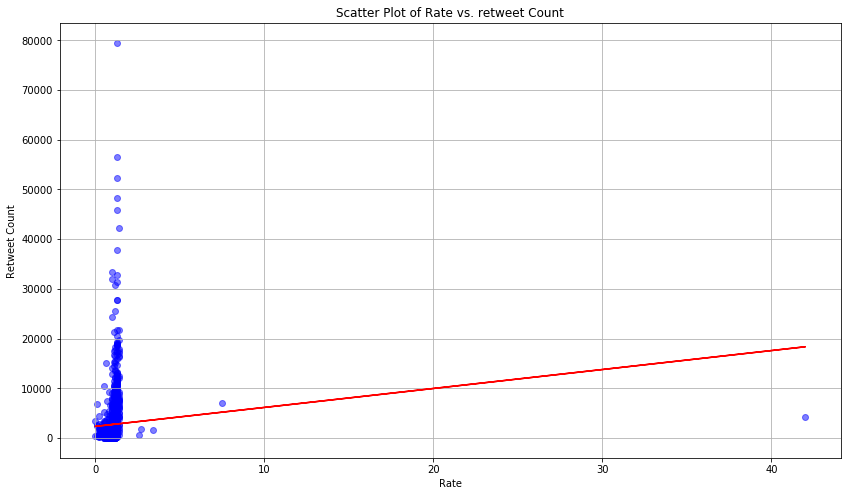

In [75]:
# Add rate data to x-axis and retweet_count data to y-axis
x = Merge_df['rate']
y = Merge_df['retweet_count']
# Create a scatter plot to compare retweet count and retweet count correlation.
plt.figure(figsize=(14, 8))
plt.scatter(x, y, alpha=0.5, color='b')
# Add a correlation line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='red')
plt.title('Scatter Plot of Rate vs. retweet Count')
#Add title and labels
plt.xlabel('Rate')
plt.ylabel('Retweet Count')
plt.grid(True)
plt.show()

In [76]:
#Calculate the correlation number between Retweet Count vs. rate
Merge_df['rate'].corr(Merge_df['retweet_count'])

0.077998939766817904

The Correlation relationship between rate and retweet_count after removing outliers

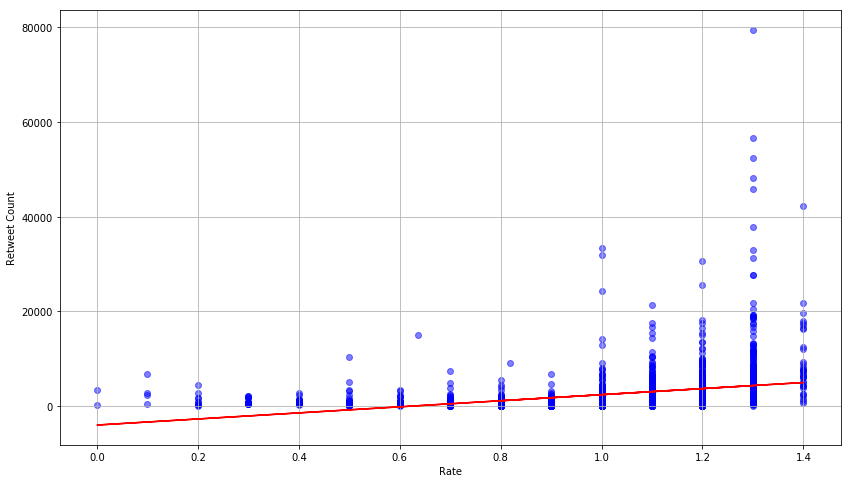

In [77]:
# Add rate data to x-axis and retweet_count data to y-axis
x = Filtered_df['rate']
y = Filtered_df['retweet_count']
# Create a scatter plot to compare retweet count and rate correlation.
plt.figure(figsize=(14, 8))
plt.scatter(x, y, alpha=0.5, color='b')
# Add a correlation line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='red')
#Add title and labels
plt.xlabel('Rate')
plt.ylabel('Retweet Count')
plt.grid(True)
plt.show()

In [78]:
Filtered_df['rate'].corr(Filtered_df['retweet_count'])

0.30025872122183062

**Summary**: Although the correlation relationship between rate and retweet_count is still a weak positive after I remove the outliers (0.077998939766817904), it still has a significant improvement when comparing the correlation before removing the outliers. The correlation after removing outliers(0.30025872122183062) is 4 times stronger than before removing outliers (0.077998939766817904)